# <u>**SMS Classifier**</u>
Developing a text classification model to
classify SMS as either spam or non-spam
using data science techniques in Python.

In [1]:
#Importing all the libraries to be used
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap


In [9]:
data = pd.read_csv(r'C:\Users\IQRA MIYAJI\OneDrive\Desktop\SMS Classifier\SPAM text message 20170820 - Data.csv',encoding='latin1')

In [10]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


What is SMS spam?  
SMS spam is any unwanted or unsolicited text message sent indiscriminately to your mobile phone, often for commercial purposes. It can take the form of a simple message, a link to a number to call or text, a link to a website for more information or a link to a website to download an application.

In [11]:
le=LabelEncoder()
data['Category']=le.fit_transform(data['Category'])
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## Text Cleaning Process

**1. Removing Unwanted URL Links**
URL links are often not useful in the context of text classification. They don't contribute much to the meaning of the text and can be distracting for machine learning algorithms. Therefore, the first step in cleaning the text is to remove any unwanted URL links.

**2. Removing Punctuation**
In the context of a text classifier, punctuation marks generally do not carry significant meaning and are often removed to simplify the text. Removing punctuation helps the algorithm focus on the essential content of the message.

**3. Retaining Alphabets Only**
To further streamline the text input for the machine learning algorithm, we should retain only alphabets. Numbers are not always crucial for text prediction tasks, and removing them can help in achieving better generalization.

**4. Lemmatization**
Lemmatization is the process of reducing words to their base or root form. This step is crucial for text cleaning as it helps in standardizing words and ensuring that variations of the same word are treated as a single entity. For example, lemmatizing the word "running" would result in "run."

By following these cleaning steps, we can prepare the text data in a more structured and meaningful way for machine learning algorithms, improving their accuracy and efficiency in text classification tasks.


## Natural language processing to reduce words to their base or root form.
**Stemming:**

The process of stemming involves removing suffixes from words to obtain their root form. Stemming might not always produce a valid word but aims to reduce words to a common base form.

Example using Porter Stemmer:
- change
- chang
- chang
- chang
- changer

**Lemmatization:**

Lemmatization involves reducing words to their base or root form while ensuring that the resulting word belongs to the language. Lemmatization often requires a dictionary or knowledge of the context of the word.

Example using WordNet Lemmatizer:
- change
- changing
- change
- changed
- changer


### Lemmatization

In [13]:
import nltk
nltk.download('wordnet')

wordnet=WordNetLemmatizer()
corpus=[]
for i in range(0,len(data)):
    review = re.sub(r'https?://\S+|www.\S+', '', data["Message"][i])
    review = re.sub(r'<.*?>', '', review)
    review = re.sub(r'[^a-zA-Z]+', ' ', review)
    review = re.sub(r'[0-9]', '', review)
    review=review.lower()
    review=review.split()
    review=[str(wordnet.lemmatize(word)) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package wordnet to C:\Users\IQRA
[nltk_data]     MIYAJI\AppData\Roaming\nltk_data...


### Applying Machine Learning Algorithm

 Separating the dependent and independent variables:

X-> Independent Variables- The Basis in which the outputs have to be calculated    
X-> Dependent Variable-The output being calculated from the inputs

In [14]:
y=data["Category"]
X=pd.DataFrame(corpus,columns=['text'])

In [15]:
from sklearn.model_selection import train_test_split #spliting data into train data and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=3000)
train_X=cv.fit_transform(X_train['text']).toarray()
test_X=cv.transform(X_test['text']).toarray()

In [17]:
train_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
print(train_X.shape)
print(test_X.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 3000)
(1115, 3000)
(4457,)
(1115,)


In [19]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB().fit(train_X,y_train)
y_pred_nb=nb.predict(test_X)

<Axes: >

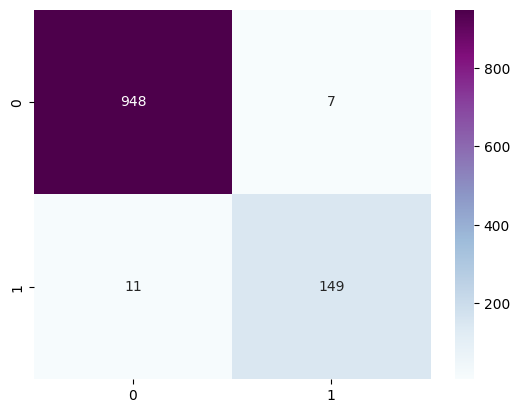

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_nb)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

**Observations:**

It's time to analyze the results of the classification model:

- 948 Non-Spam emails have been correctly classified.
- 149 Spam emails have been correctly classified.
- 7 Non-Spam emails have been classified as Spam mails (False Positives or Type I Error).
- 11 Spam emails have been classified as Non-Spam (False Negatives or Type II Error).

These observations provide a breakdown of the model's performance on both spam and non-spam emails. Understanding false positives and false negatives is crucial for evaluating the effectiveness of the classification model. 

Before delving deeper into the analysis, let's proceed to explore the results of the next model!


### Applying Random forest.

<Axes: >

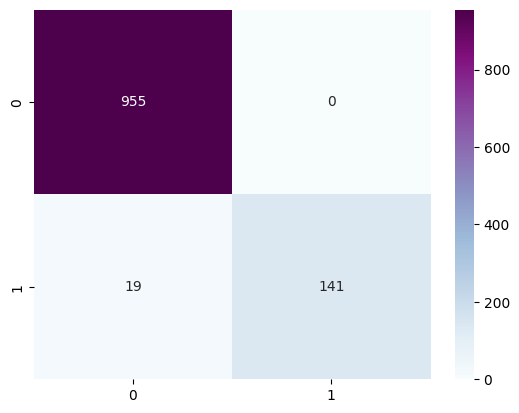

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=0).fit(train_X,y_train)
y_pred_rfc=rfc.predict(test_X)
cm=confusion_matrix(y_test,y_pred_rfc)
sns.heatmap(cm,cmap='BuPu',annot=True,fmt='d')

**Observations:**

Comparing the results using the Random Forest Classifier:

- 955 Non-Spam emails have been correctly classified.
- 141 Spam emails have been correctly classified.
- 0 Non-Spam emails have been classified as Spam mails (False Positives or Type I Error).
- 19 Spam emails have been classified as Non-Spam (False Negatives or Type II Error).

Now that we have the results from both models, it's a crucial step to understand and analyze the performance of each model. Key metrics such as accuracy, precision, recall, and F1-score can provide a more comprehensive evaluation. Additionally, considering the specific requirements of your task will help in determining which model is more suitable for the given classification problem.

Further analysis may involve comparing the confusion matrices, calculating precision, recall, accuracy, and exploring any potential trade-offs between false positives and false negatives. These insights will guide decisions on model selection and potential improvements to achieve better performance.


## Understanding the Results  
Now since, we have checked the outputs from the two algorithms- the main question that arises is- which model is better?

The best approach in order to undertsand and estimate this is by evaluating the mtrics. Usually the metrics to evaluate the performance of a Classification Problem are- Precision and Recall
![Calculation of Precision, Recall, and Accuracy](https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm)


In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print('******** Naive Bayes Classifier **********')
print('Precision Score: ',precision_score(y_test,y_pred_nb))
print('Recall Score: ',recall_score(y_test,y_pred_nb))
print('****************************************')
print('******** Random Forest Classifier **********')
print('Precision Score: ',precision_score(y_test,y_pred_rfc))
print('Recall Score: ',recall_score(y_test,y_pred_rfc))

******** Naive Bayes Classifier **********
Precision Score:  0.9551282051282052
Recall Score:  0.93125
****************************************
******** Random Forest Classifier **********
Precision Score:  1.0
Recall Score:  0.88125
